<a href="https://colab.research.google.com/github/AaronBM/MonteCarlo/blob/master/RandomWalk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Refernce code for 1-d and 2-d walk


https://www.geeksforgeeks.org/random-walk-implementation-python/

https://stackoverflow.com/questions/37052140/1d-random-walk-from-matlab-to-python

###Info for plotting
https://docs.python.org/3/library/random.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_title.html



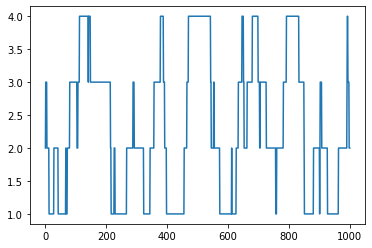

In [112]:
# Python code for 1-D random walk.
import random
import numpy as np
import matplotlib.pyplot as plt
  
# Probability to move up or down
prob = [0.05, 0.95]  
  
# statically defining the starting position
start = 2  
positions = [start]
  
# creating the random points
rr = np.random.random(1000)
downp = rr < prob[0]
upp = rr > prob[1]
  
  
for idownp, iupp in zip(downp, upp):
    down = idownp and positions[-1] > 1
    up = iupp and positions[-1] < 4
    positions.append(positions[-1] - down + up)
  
# plotting down the graph of the random walk in 1D
plt.plot(positions)
plt.show()

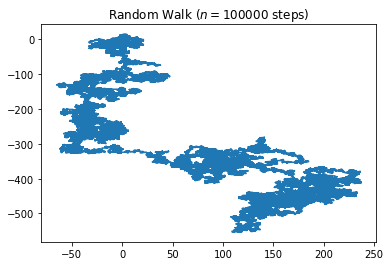

In [113]:
# Python code for 2D random walk.
import numpy
import pylab
import random
  
# defining the number of steps
n = 100000
  
#creating two array for containing x and y coordinate
#of size equals to the number of size and filled up with 0's
x = numpy.zeros(n)
y = numpy.zeros(n)
  
# filling the coordinates with random variables
for i in range(1, n):
    val = random.randint(1, 4)
    if val == 1:
        x[i] = x[i - 1] + 1
        y[i] = y[i - 1]
    elif val == 2:
        x[i] = x[i - 1] - 1
        y[i] = y[i - 1]
    elif val == 3:
        x[i] = x[i - 1]
        y[i] = y[i - 1] + 1
    else:
        x[i] = x[i - 1]
        y[i] = y[i - 1] - 1
      
  
# plotting stuff:
pylab.title("Random Walk ($n = " + str(n) + "$ steps)")
pylab.plot(x, y)
pylab.savefig("rand_walk"+str(n)+".png",bbox_inches="tight",dpi=600)
pylab.show()

#  Beginning of Random Walk path to Bar or River

1. Basic single run; Bar/River, Forward/Backward, or East/West 
2. Monte Carlo Approach for; min/max steps, start bias, success/failures  
3. Add 2-D,  North/South/East/West or Bar/River/Home/Jail 
4. Add restart from Bar with more drinks and stumble. Add return to bar stats.
5. Run serial vs. parallel to evaluate run time.
6. Run GPU vs TPU to see advanced paralleization 
7. Build with SimPY to try running concurrent walkers.


##1. Basic single run; Bar/River, Forward/Backward, or East/West 

In [109]:
# Python code for 1-D random walk.
import random
import numpy as np
import matplotlib.pyplot as plt
import pylab
import pandas as pd
random.seed(42)

In [97]:
x =random.random()
xx= random.randint(0,4)
print(x,xx)


def drunkwalk(StartPosition = 5,River = 0,Bar = 10):

    Position = StartPosition
    StepCount = 0
    Walking =1
    while Walking==1:
        Step = random.randint(0,1)
        if Step == 1:
            Position  += 1
            StepCount += 1
        else:  
            Position  -= 1
            StepCount += 1

    #print(Position)


        if Position == River:
            print("Fell into the River!")
            Walking =0
            print(StepCount)
            return(StepCount,"Swimming")
        if Position == Bar:
            print("Time for another drink!")
            print(StepCount)
            Walking =0
            return(StepCount,"Drinking")


#Steps, Trial = drunkwalk()
#print("Trip ended up "+trial+" after taking "+str(StepCount)+" steps!")

0.9392371403247157 0


In [87]:
Steps, Trial = drunkwalk()
print("Trip ended up "+trial+" after taking "+str(StepCount)+" steps!")

Fell into the River!
5
Trip ended up Drinking after taking 41 steps!


##2. Monte Carlo Approach for; min/max steps, start bias, success/failures 

In [106]:
n=100
Walks = pd.concat([pd.DataFrame([drunkwalk()], columns=['Steps','Result']) for i in range(0,n)],ignore_index=True)

Time for another drink!
59
Time for another drink!
7
Time for another drink!
17
Time for another drink!
45
Fell into the River!
19
Fell into the River!
49
Time for another drink!
21
Time for another drink!
33
Time for another drink!
31
Time for another drink!
29
Time for another drink!
41
Time for another drink!
13
Time for another drink!
13
Fell into the River!
11
Fell into the River!
25
Time for another drink!
15
Time for another drink!
45
Fell into the River!
19
Fell into the River!
69
Fell into the River!
11
Time for another drink!
19
Time for another drink!
55
Time for another drink!
25
Fell into the River!
13
Fell into the River!
7
Fell into the River!
59
Time for another drink!
49
Time for another drink!
51
Time for another drink!
9
Time for another drink!
9
Time for another drink!
25
Fell into the River!
17
Time for another drink!
11
Time for another drink!
15
Fell into the River!
9
Time for another drink!
37
Time for another drink!
111
Time for another drink!
15
Fell into the 

In [118]:
Walks.describe()

,Steps
count,100.000000
mean,25.900000
std,18.613289
min,5.000000
25%,13.000000
50%,19.000000
75%,37.000000
max,111.000000


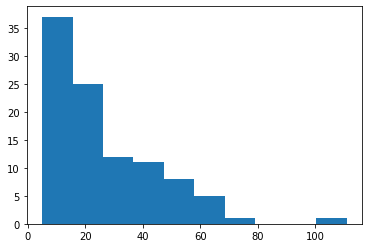

In [121]:
plt.hist(Walks.Steps)
plt.show()

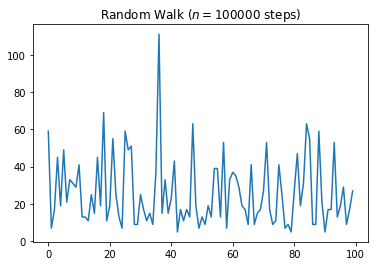

In [122]:
pylab.title("Random Walk ($n = " + str(n) + "$ steps)")
pylab.plot(Walks.Steps)
pylab.savefig("rand_walk"+str(n)+".png",bbox_inches="tight",dpi=600)
pylab.show()